# Diseño Experimental IV

In [ ]:
# Requerimientos
!pip install seaborn -q # Para visualización y datasets
!pip install scipy -q # Para analísis estadísticos
!pip install numpy -q # Para cálculos científicos
!pip install pandas -q # Para almacenamiento y trabajo con datos
!pip install matplotlib -q # Para visualización
!pip install statsmodels -q # Para analísis estadísticos
!pip install rdatasets -q # datasets de R
!pip install scikit-learn -q # Análisis relacionados a Machine Learning
!pip install pingouin -q # Análisis estadísticos
!pip install pyDOE3 -q # Creación de diseño experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.3 MB/s eta 0:00:00


Para abrir en Google Colab: <a target="_blank" href="https://githubtocolab.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/Clases/Clase21_DisenoExperimentalVII.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Diseño Experimental Factorial Fraccionario

Para poder realizar el desiño experimental, un paquete últil es [pyDOE](https://pydoe3.readthedocs.io/en/latest/), el cual nos permite generar los diseños experimentales que buscamos. Para mayor información y diseños disponibles visitar la documentación del paquete.

In [ ]:
import pyDOE3 as doe
import pandas as pd
import numpy as np

design, alias_map, alias_cost = doe.fracfact_opt(
    n_factors = 7, # The number of factors to analyze
    n_erased = 1 # Represents the number of factors to cofound
) # design 2^(7-1)

desing_matrix = doe.fracfact(design)
print('Diseño Generado:', design)
print('Alias:\n'+'\n'.join(alias_map))
print('Matriz de Diseño:\n', desing_matrix)

Diseño Generado: a b c d e f abcdef
Alias:
a = bcdefg
b = acdefg
c = abdefg
d = abcefg
e = abcdfg
f = abcdeg
g = abcdef
ab = cdefg
ac = bdefg
ad = bcefg
ae = bcdfg
af = bcdeg
ag = bcdef
bc = adefg
bd = acefg
be = acdfg
bf = acdeg
bg = acdef
cd = abefg
ce = abdfg
cf = abdeg
cg = abdef
de = abcfg
df = abceg
dg = abcef
ef = abcdg
eg = abcdf
fg = abcde
abc = defg
abd = cefg
abe = cdfg
abf = cdeg
abg = cdef
acd = befg
ace = bdfg
acf = bdeg
acg = bdef
ade = bcfg
adf = bceg
adg = bcef
aef = bcdg
aeg = bcdf
afg = bcde
bcd = aefg
bce = adfg
bcf = adeg
bcg = adef
bde = acfg
bdf = aceg
bdg = acef
bef = acdg
beg = acdf
bfg = acde
cde = abfg
cdf = abeg
cdg = abef
cef = abdg
ceg = abdf
cfg = abde
def = abcg
deg = abcf
dfg = abce
efg = abcd
abcdefg
Matriz de Diseño:
 [[-1. -1. -1. -1. -1. -1.  1.]
 [-1. -1. -1. -1. -1.  1. -1.]
 [-1. -1. -1. -1.  1. -1. -1.]
 [-1. -1. -1. -1.  1.  1.  1.]
 [-1. -1. -1.  1. -1. -1. -1.]
 [-1. -1. -1.  1. -1.  1.  1.]
 [-1. -1. -1.  1.  1. -1.  1.]
 [-1. -1. -1.  1.  1

## Caso de Estudio: Análisis de variabilidad en la producción de sopas deshidratadas

In [ ]:
# Design
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import itertools as it

design, alias_map, alias_cost = doe.fracfact_opt(
    n_factors = 5, # The number of factors to analyze
    n_erased = 1 # Represents the number of factors to cofound
)
print(design)
design_matrix = doe.fracfact(design)
var_desi = ['BatchWt','MixTime','Temp','Ports','delay']
df_soup = pd.DataFrame(design_matrix, columns= var_desi)
response = [1.13, 1.25, .97, 1.70, 1.47, 1.28, 1.18, .98, .78, 1.36, 1.85, .62, 1.09, 1.10, .76, 2.10 ]
df_soup['Response'] = response
df_soup

a b c d abcd


,BatchWt,MixTime,Temp,Ports,delay,Response
0,-1.0,-1.0,-1.0,-1.0,1.0,1.13
1,-1.0,-1.0,-1.0,1.0,-1.0,1.25
2,-1.0,-1.0,1.0,-1.0,-1.0,0.97
3,-1.0,-1.0,1.0,1.0,1.0,1.70
4,-1.0,1.0,-1.0,-1.0,-1.0,1.47
5,-1.0,1.0,-1.0,1.0,1.0,1.28
6,-1.0,1.0,1.0,-1.0,1.0,1.18
7,-1.0,1.0,1.0,1.0,-1.0,0.98
8,1.0,-1.0,-1.0,-1.0,-1.0,0.78
9,1.0,-1.0,-1.0,1.0,1.0,1.36


In [ ]:

# Analisis ANOVA
# Cuando las formulas de los modelos se ponen complicadas es mejor armarlas previamente
formula = 'Response ~ '
for var1 in var_desi:
    formula += var1 + ' + '
    for var2 in var_desi:
        if var1 != var2:
            formula += var1 + ':' + var2 + ' + '

formula = formula.strip(' + ')
print(formula)

model_soup = ols(formula, data=df_soup).fit()
print(model_soup.summary())
anova_soup = anova_lm(model_soup, type = 'II')
anova_soup

Response ~ BatchWt + BatchWt:MixTime + BatchWt:Temp + BatchWt:Ports + BatchWt:delay + MixTime + MixTime:BatchWt + MixTime:Temp + MixTime:Ports + MixTime:delay + Temp + Temp:BatchWt + Temp:MixTime + Temp:Ports + Temp:delay + Ports + Ports:BatchWt + Ports:MixTime + Ports:Temp + Ports:delay + delay + delay:BatchWt + delay:MixTime + delay:Temp + delay:Ports
                            OLS Regression Results                            
Dep. Variable:               Response   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 02 Jun 2025   Prob (F-statistic):                nan
Time:                        21:22:38   Log-Likelihood:                 536.96
No. Observations:                  16   AIC:                            -1042.
Df Residuals:                       0   BIC:                            -1030.
Df Model:   

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning:

invalid value encountered in scalar multiply

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/anova.py:142: RuntimeWarning:

divide by zero encountered in scalar divide



,df,sum_sq,mean_sq,F,PR(>F)
BatchWt,1.0,5.625000e-03,0.005625,0.0,NaN
BatchWt:MixTime,1.0,2.102500e-02,0.021025,0.0,NaN
BatchWt:Temp,1.0,1.056250e-01,0.105625,0.0,NaN
BatchWt:Ports,1.0,3.600000e-03,0.003600,0.0,NaN
BatchWt:delay,1.0,3.969000e-01,0.396900,0.0,NaN
MixTime,1.0,5.625000e-03,0.005625,0.0,NaN
MixTime:Temp,1.0,1.822500e-02,0.018225,0.0,NaN
MixTime:Ports,1.0,3.610000e-02,0.036100,0.0,NaN
MixTime:delay,1.0,7.290000e-02,0.072900,0.0,NaN
Temp,1.0,3.062500e-02,0.030625,0.0,NaN


In [ ]:
parameters

,0
BatchWt,0.01875
BatchWt:MixTime,0.03625
BatchWt:Temp,0.08125
BatchWt:Ports,0.01500
BatchWt:delay,0.15750
MixTime,0.01875
MixTime:Temp,0.03375
MixTime:Ports,0.04750
MixTime:delay,0.06750
Temp,0.04375


<ipython-input-56-a9765ab6fc1a>:101: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



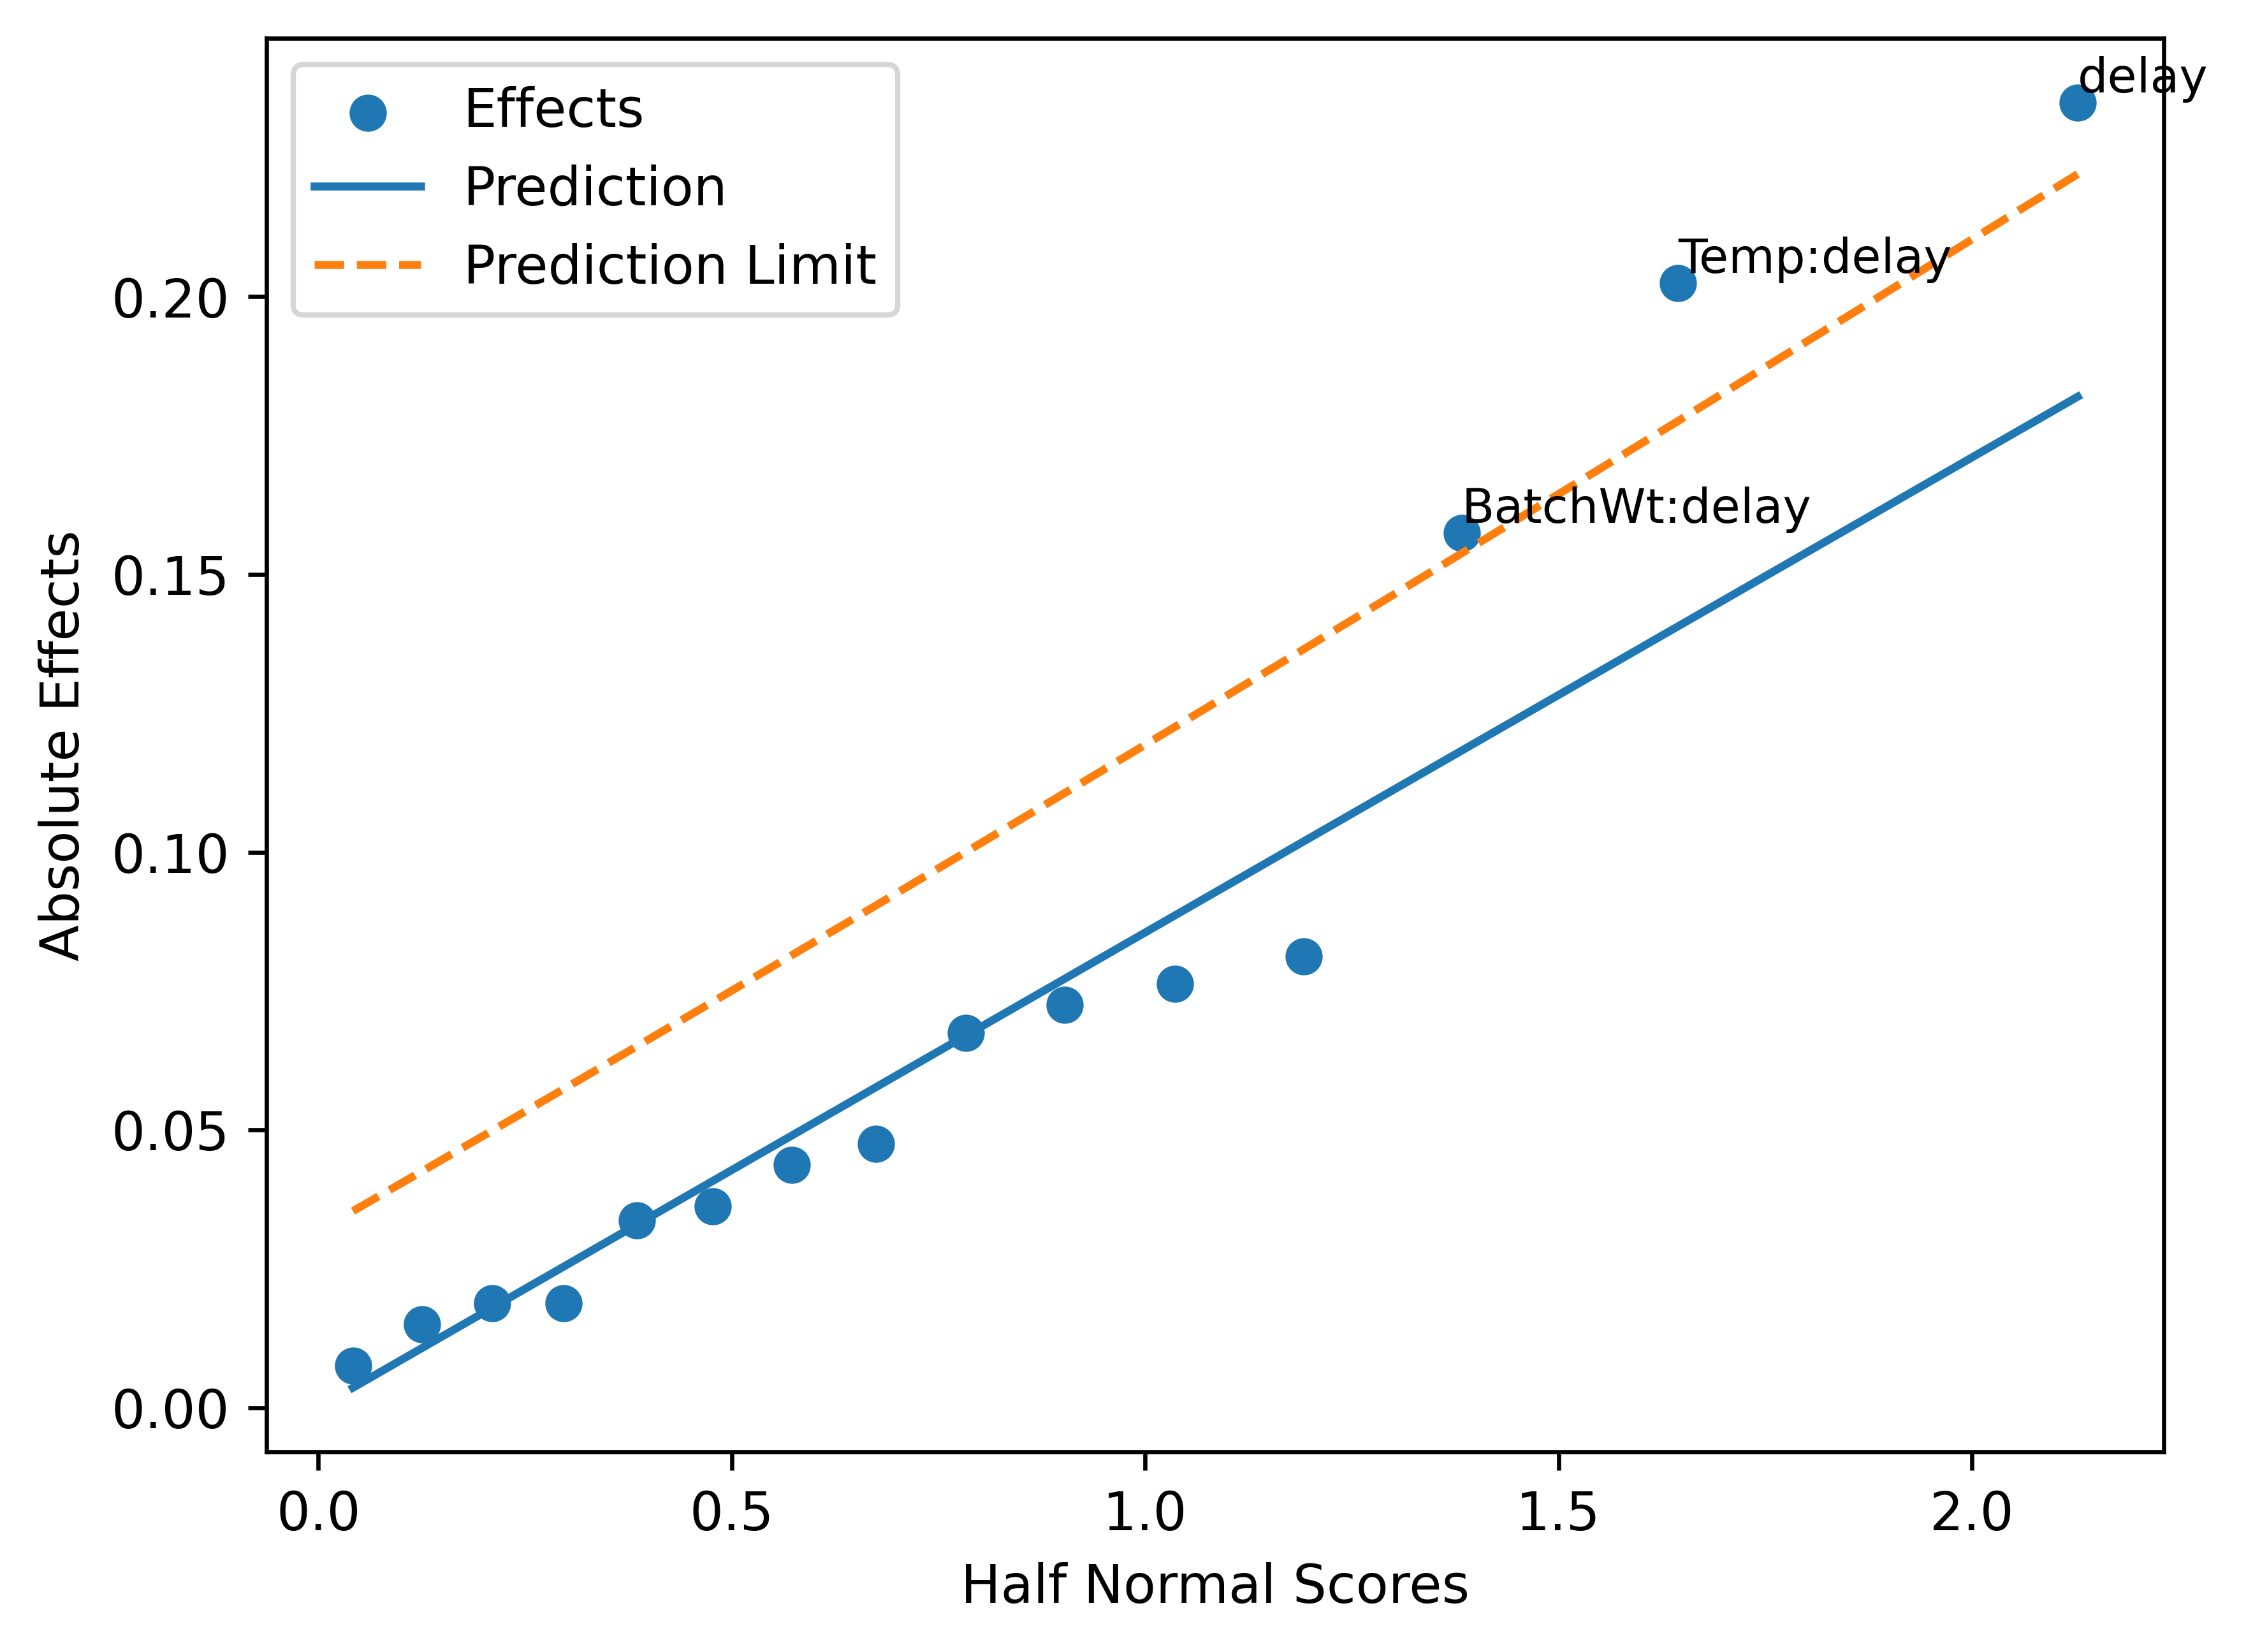

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.factorplots import interaction_plot
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def LGBc(beta, alpha=0.05, rpt=True, plt_show=True, pltl=True, labels = None,
         plot_only = True):
    """
    Calculates the LGB Statistic and plots the half-normal effect.
    ---
    Parameters:
    beta: np.array
        The array of values of coefficients to plot
    alpha: float
        The significance value
    rpt: bool
        Report or not
    plt_show: bool
        Show the plot
    pltl: bool
        Plot the line
    labels:
        Label the siginficant effects
    ---
    Returns:
    sigi: list
        The list of significant effects
    ---
    Reference:
    https://github.com/cran/daewr/blob/master/R/LGBc.R
    """
    siglev = [0.1, 0.05, 0.025, 0.01]
    df_values = [7, 8, 11, 15, 16, 17, 26, 31, 32, 35, 63, 127]
    crittab = np.array([
        [1.265, 1.534, 1.889, 2.506],
        [1.196, 1.385, 1.606, 2.026],
        [1.161, 1.291, 1.449, 1.74],
        [1.122, 1.201, 1.297, 1.447],
        [1.110, 1.186, 1.274, 1.421],
        [1.106, 1.178, 1.260, 1.377],
        [1.072, 1.115, 1.165, 1.232],
        [1.063, 1.099, 1.140, 1.197],
        [1.060, 1.093, 1.130, 1.185],
        [1.059, 1.091, 1.127, 1.178],
        [1.037, 1.056, 1.074, 1.096],
        [1.023, 1.034, 1.043, 1.058]
    ])

    if alpha not in siglev:
        raise ValueError("This function only works when alpha=0.1, 0.05, 0.025, or 0.01")
    if len(beta) not in df_values:
        raise ValueError("This function only works for specific coefficient vector lengths.")

    colind = siglev.index(alpha)
    rowind = df_values.index(len(beta))
    critL = crittab[rowind, colind]

    # Caclulate Beta1, Beta 2, and RN statstics

    acj = np.abs(beta)
    ranks = stats.rankdata(acj, method = 'ordinal')
    s0 = 1.5 * np.median(acj)
    p = (ranks - 0.5) / len(beta)

    z = stats.norm.ppf((p + 1) / 2)
    pd_lm1 = pd.DataFrame({'acj':acj, 'z':z})
    lm1 = ols('acj ~ -1 + z', data = pd_lm1).fit()
    beta1 = lm1.params.iloc[0]

    sel = acj < 2.5 * s0
    pd_lm2 = pd.DataFrame({'acj':acj[sel], 'z':z[sel]})
    lm2 = ols('acj ~ -1 + z', data = pd_lm2).fit()
    beta2 = lm2.params.iloc[0]
    Rn = beta1/beta2
    # Finds prediction limits for values in sorted absolute Beta
    pred = beta2 * z
    n = np.sum(sel)
    df = n - 1
    sig = np.sqrt(np.sum(lm2.resid**2)/df)
    se_pred = sig * np.sqrt(1 + 1/n + (z**2) / np.sum(z[sel]**2))
    pred_lim = pred + stats.t.ppf(0.975, df) * se_pred
    # Gets significance indicators
    sigi = np.array([0] * len(beta))
    sigi[acj > pred_lim] = 1
    sigi = ['yes' if x == 1 else 'no' for x in sigi]
    # plots
    if plt_show:
        fig, ax = plt.subplots(dpi = 600)
        ax.scatter(z, acj, label="Effects")
        ax.plot(np.sort(z), np.sort(pred), linestyle="-", label="Prediction")

        if pltl:
            ax.plot(np.sort(z), np.sort(pred_lim), linestyle="--", label="Prediction Limit")
        if len(labels) == len(beta):

            for i, label in enumerate(sigi):
                if label == "yes":

                    ax.text(z[i], acj[i], str(labels[i]), fontsize=9, verticalalignment='bottom')
        ax.set_xlabel("Half Normal Scores")
        ax.set_ylabel("Absolute Effects")
        ax.legend()
        plt.show()
    # reports
    if rpt:
        print("Effect Report")
        print("Label     Half Effect    Sig(.05)")
        for i, (b, s) in enumerate(zip(beta, sigi)):
            print(f"{i:<8} {b:<8.3f} {'YES' if s == 'yes' else 'NO' }")
        print(f"Lawson, Grimshaw & Burt Rn Statistic = {Rn:.3f}")
        print(f"95th percentile of Rn = {critL:.3f}")
    if not plot_only:
        return sigi

LGBc(model_soup.params.drop('Intercept'), rpt = False, labels = model_soup.params.index[1:], plot_only = True)

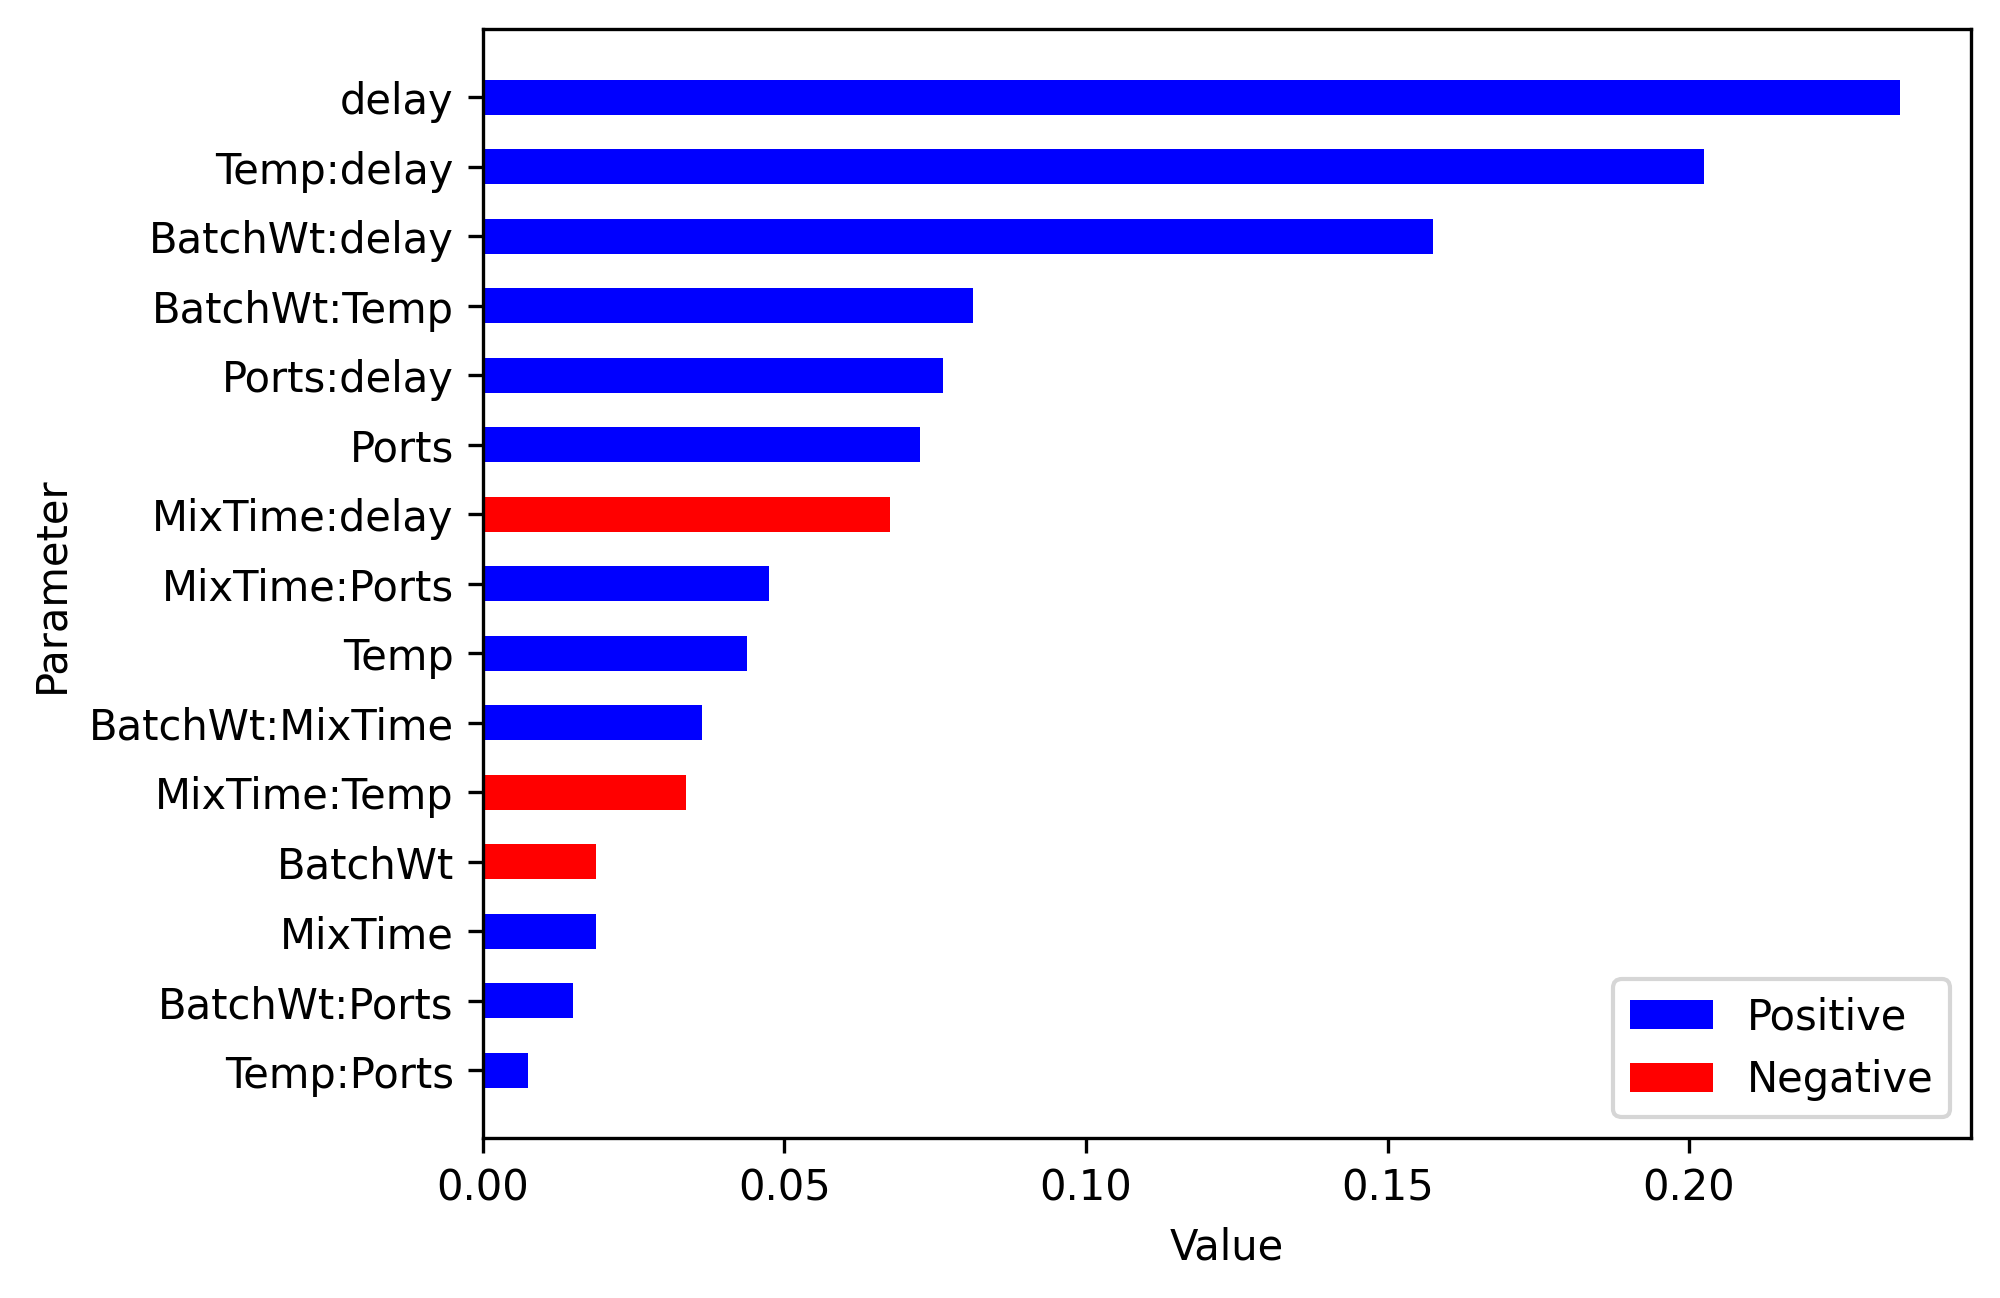

In [ ]:
# Plot de Pareto

# pareto plot
fig, ax = plt.subplots(dpi = 300)

params_model = model_soup.params.copy().rename('params').to_frame()
params_model['abs_params'] = abs(params_model['params'])
params_model.sort_values(by='abs_params', ascending = False, inplace = True)
neg, pos = ['red', 'blue']
label_neg = 0
label_pos = 0
for row in params_model.index[::-1]:
    name = row
    value = params_model.at[row, 'params']

    if name == 'Intercept':
        continue
    color = neg if value < 0 else pos
    if value > 0 and label_pos == 0 :
        label_pos += 1
        ax.barh(y = name, width = np.abs(value), height = 0.5, color = color , label = 'Positive')
    elif value < 0 and label_neg == 0:
        label_neg += 1
        ax.barh(y = name, width = np.abs(value), height = 0.5, color = color , label = 'Negative')
    else:
        ax.barh(y = name, width = np.abs(value), height = 0.5, color = color)

ax.legend()
ax.set_xlabel('Value')
ax.set_ylabel('Parameter')
# set legend as the negative or positive value given by collor


plt.show()

A partir de estos análisis obtenemos que los valores significativos provienen de la variable `delay`, `Temp`, `BatchWt`. De forma que podemos generar un modelo reducido.

In [ ]:
model_res_soup = ols('Response ~ delay + Temp + BatchWt + delay:Temp + delay:BatchWt', data = df_soup).fit()
print(model_res_soup.summary())
### Anova
anova_res_soup = anova_lm(model_res_soup, type = 'II')
anova_res_soup

                            OLS Regression Results                            
Dep. Variable:               Response   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     8.945
Date:                Mon, 02 Jun 2025   Prob (F-statistic):            0.00187
Time:                        21:39:41   Log-Likelihood:                 6.0251
No. Observations:                  16   AIC:                          -0.05022
Df Residuals:                      10   BIC:                             4.585
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2263      0.053     23.354

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.



,df,sum_sq,mean_sq,F,PR(>F)
delay,1.0,0.883600,0.883600,20.030604,0.001187
Temp,1.0,0.030625,0.030625,0.694248,0.424177
BatchWt,1.0,0.005625,0.005625,0.127515,0.728443
delay:Temp,1.0,0.656100,0.656100,14.873335,0.003178
delay:BatchWt,1.0,0.396900,0.396900,8.997450,0.013353
Residual,10.0,0.441125,0.044113,NaN,NaN


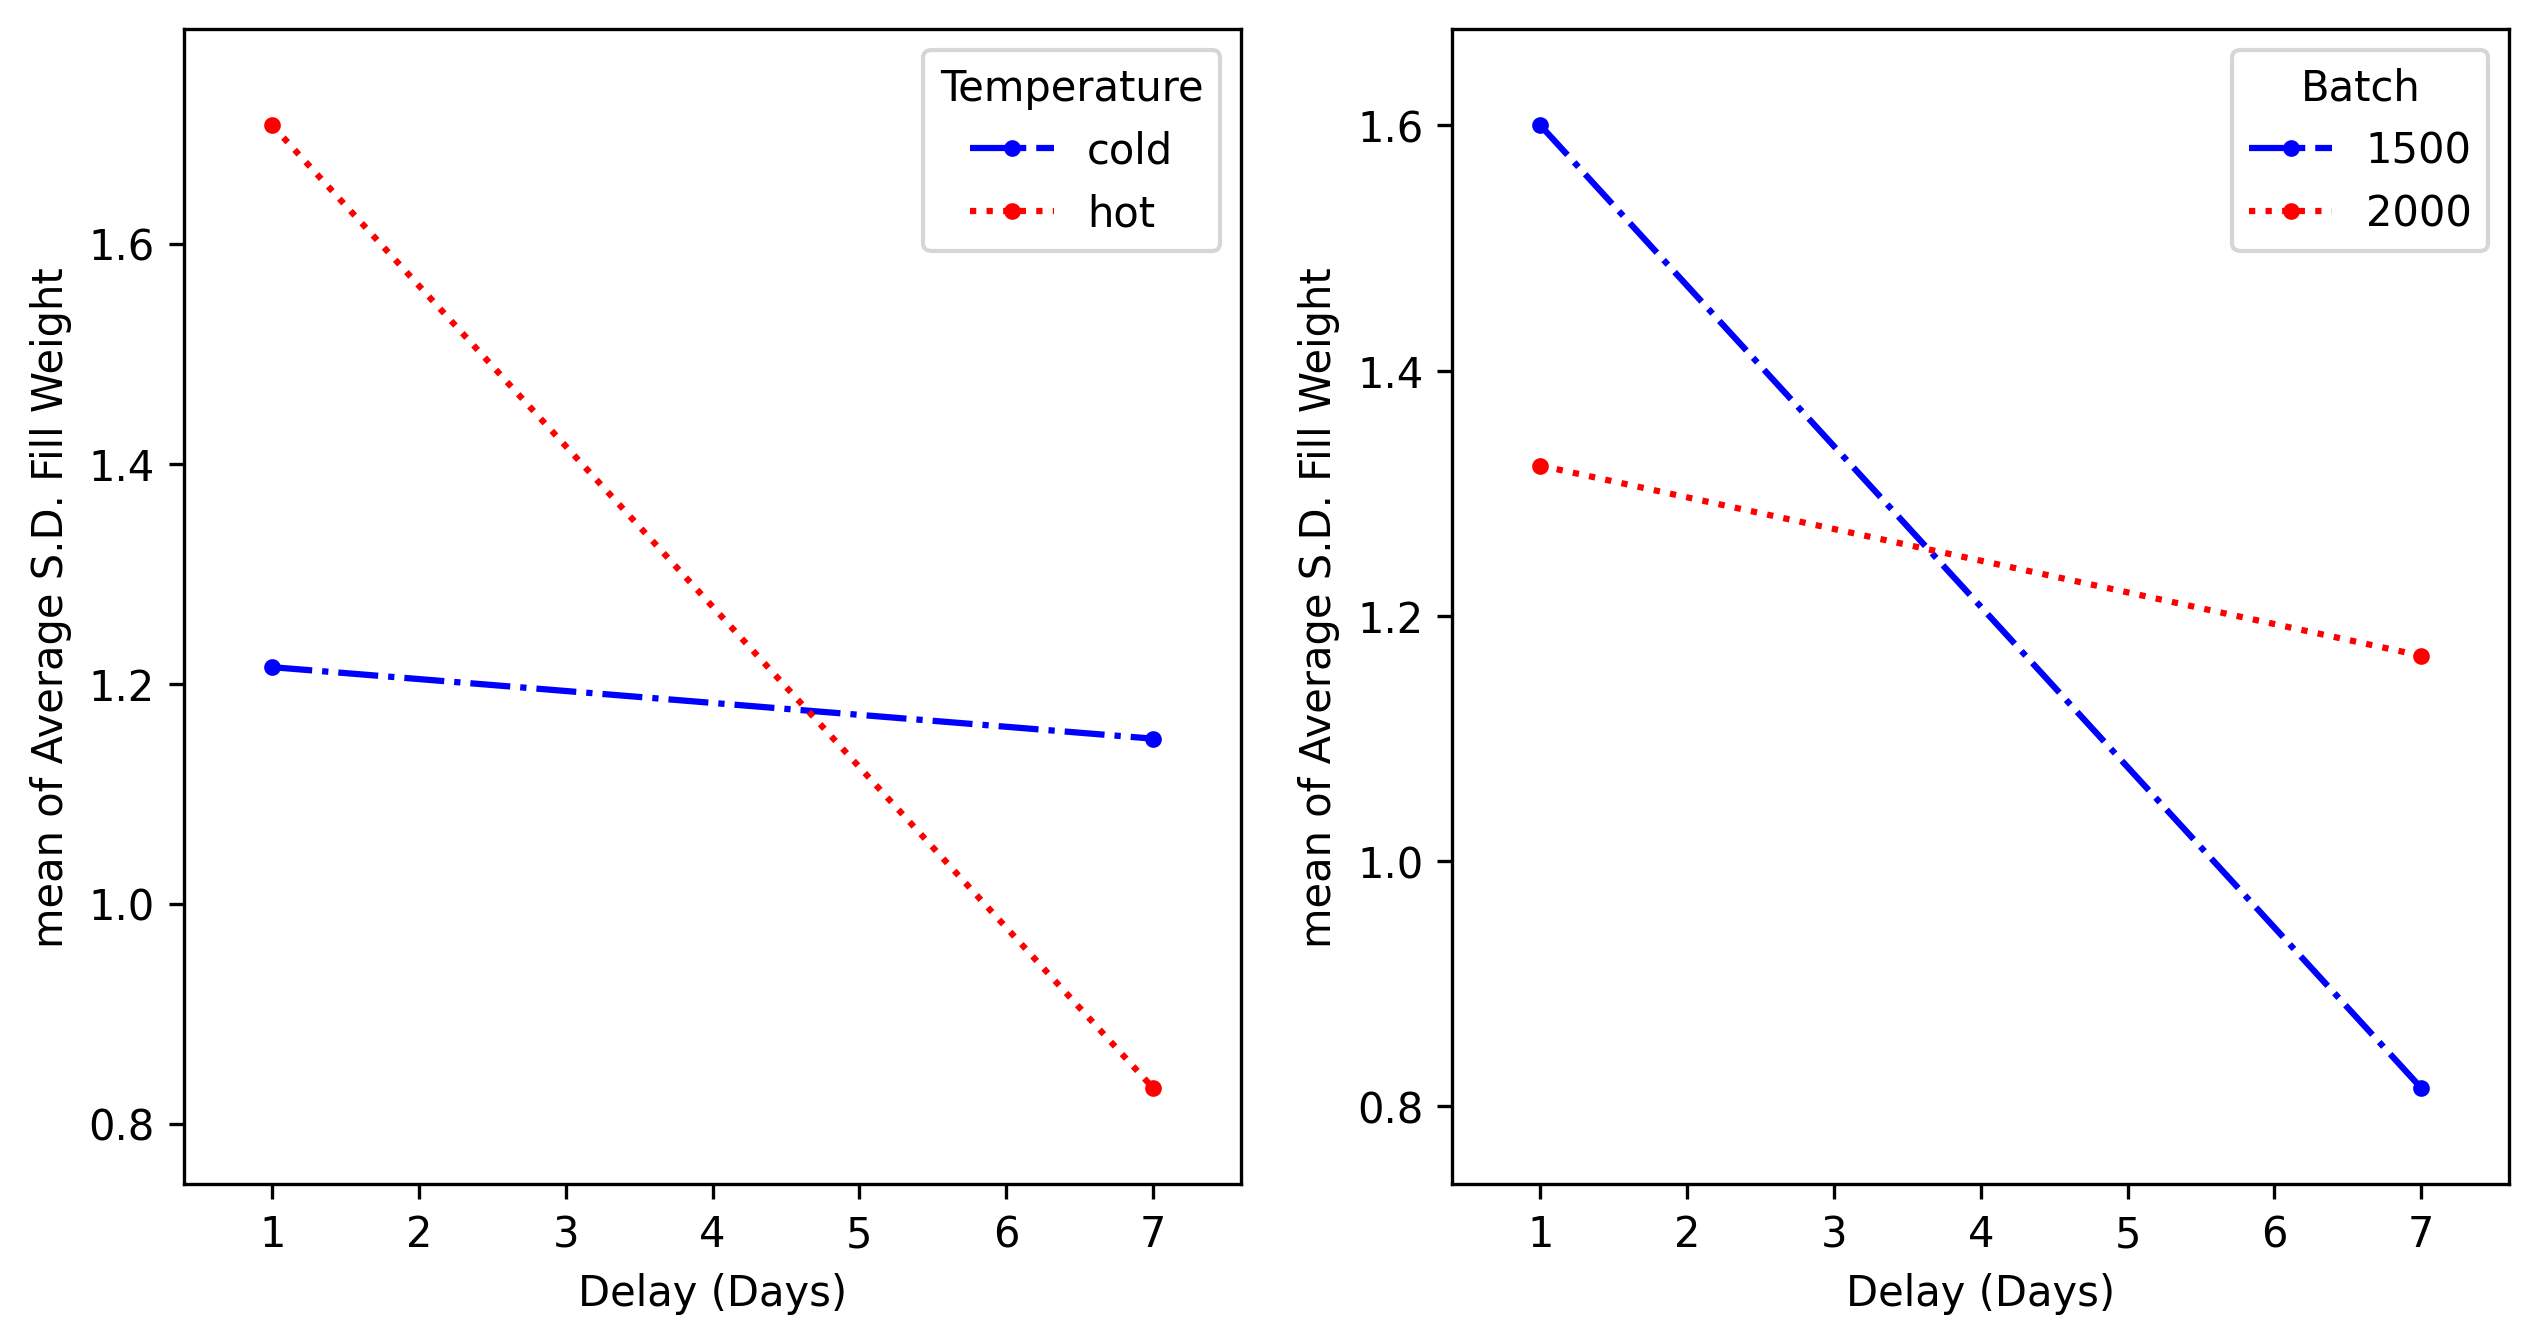

In [ ]:
# Generamos los plots de interaccion
from statsmodels.graphics.factorplots import interaction_plot
fig, ax = plt.subplots(1,2, figsize = (10,5), dpi = 300)
delay_days = [7 if x == -1 else 1 for x in df_soup['delay']]
response = df_soup['Response']
temperature = ['hot' if x == 1 else 'cold' for x in df_soup['Temp']]
batch = [1500 if x == 1 else 2000 for x in df_soup['BatchWt']]
interaction_plot(
    x = delay_days,
    trace = temperature,
    response = df_soup['Response'],
    colors = ['blue', 'red'],
    legendtitle='Temperature',
    xlabel = 'Delay (Days)',
    ylabel = 'Average S.D. Fill Weight',
    linestyles = ['-.',':'],
    ax = ax[0]
)

interaction_plot(
    x = delay_days,
    trace = batch,
    response = df_soup['Response'],
    colors = ['blue', 'red'],
    legendtitle='Batch',
    xlabel = 'Delay (Days)',
    ylabel = 'Average S.D. Fill Weight',
    linestyles = ['-.',':'],
    ax = ax[1]
)

plt.show()